In [ ]:
import numpy as np
import scipy.special
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import glob

In [4]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learningrate):
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = np.random.normal(0.0,pow(self.hnodes, -0.5),(self.hnodes, self.inodes))
        self.who = np.random.normal(0.0,pow(self.onodes, -0.5),(self.onodes, self.hnodes))
        
        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        
        hidden_errors = np.dot(self.who.T, output_errors)
        
        
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

***correct_label :  2
***correct_label :  0
***correct_label :  2
***correct_label :  0
***correct_label :  0
***correct_label :  1
***correct_label :  5
***correct_label :  5
***correct_label :  5


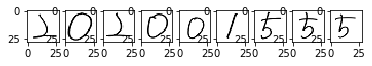

In [27]:
data_correct_list = np.array([])
image_data_list = np.empty((0,784),float)
for image_file_name in glob.glob('image/?_?.png'):
    correct_label = int(image_file_name[-5:-4])
    data_correct_list = np.append(data_correct_list, correct_label)
    print("***correct_label : ", correct_label)
    
    image_array = imageio.imread(image_file_name)
    
    plt.subplot(1,9,int(image_file_name[-7:-6])+1)
    plt.imshow(image_array, cmap='Reds', interpolation = 'None')
    
    image_array = image_array[:,:,0]
    
    image_data = 255.0 - image_array.reshape(784)
    image_data = (image_data/255.0*0.99) + 0.01
    
    image_data_list = np.append(image_data_list,[image_data],axis=0)

plt.show()

In [5]:
input_nodes = 784
hidden1_nodes = 100
hidden2_nodes = 100
output_nodes = 10

learning_rate = 0.03

n = neuralNetwork(input_nodes, hidden1_nodes, hidden2_nodes, output_nodes, learning_rate)